# Using Data Manipulation, Cleaning and Visualization Techniques on Movie Ranking Dataset from GroupLens Research

In this script various data analysis techniques used to analize data on movie rankings. This dataset gathered from GroupLens Research and it can be accessed from [here](https://grouplens.org/datasets/movielens/).

## About the Dataset
This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

This is a *development* dataset. As such, it may change over time and is not an appropriate dataset for shared research results. See available *benchmark* datasets if that is your intent.

This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.
The dataset includes recall information related to specific NHTSA campaigns. The dataset has 4 different recall type: tires, vehicles, car seats, and equipment. The earliest campaign data is from 1966. The dataset gathered on 8th September 2021.

## Table of Contents
1. Data Cleaning and Manipulation
2. Total Count of Each Rating Value

## 1. Data Cleaning and Manipulation
In this section we are going to clean the data from missing values and we are going to change some of the column values and data types, and stick some dataframes together with joins.

In [1]:
# Importing the libraries.
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Getting the current working directory.
pwd = os.getcwd()

# Importing the datasets
links = pd.read_csv(pwd + "\\Dataset\\links.csv")
movies = pd.read_csv(pwd + "\\Dataset\\movies.csv")
ratings = pd.read_csv(pwd + "\\Dataset\\ratings.csv")
tags = pd.read_csv(pwd + "\\Dataset\\tags.csv")

### About these Files:

links.csv = Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. Each line of this file after the header row represents one movie.

movies.csv = Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie.

ratings.csv = All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user.

tags.csv = All tags are contained in the file `tags.csv`. Each line of this file after the header row represents one tag applied to one movie by one user.

### About the Variables

User Ids = MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between `ratings.csv` and `tags.csv` (i.e., the same id refers to the same user across the two files).

Movie Ids = Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id `1` corresponds to the URL <https://movielens.org/movies/1>). Movie ids are consistent between `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv` (i.e., the same id refers to the same movie across these four data files).




In [3]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


If we look at the tags dataframe it has column named timestamp. According to the datasets information: "Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970." it uses [Epoch time](https://en.wikipedia.org/wiki/Unix_time) format in this column. This format allows us to store the date and time without dealing with timezones. It is useful in someways but its hard to read for humans and we have to convert to normal "yyyy-mm-dd" format to read it proparly.

In [4]:
# Let's convert this column to normal datetime format.
tags["timestamp"] = pd.to_datetime(tags["timestamp"], unit="s")
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20
...,...,...,...,...
3678,606,7382,for katie,2007-02-11 22:46:59
3679,606,7936,austere,2007-03-08 22:18:54
3680,610,3265,gun fu,2017-05-03 20:39:44
3681,610,3265,heroic bloodshed,2017-05-03 20:39:38


As the tags dataframe, the ratings dataframe has the timestamp column and we are going to convert it as well.

In [5]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit="s")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


The movies dataframe has information about movie titles and genres. Each row represents a movie and if we look into links dataframe it also refers information about same movies with same "movieId" column. So it would be easier for us to use this dataframes if we join them together. So let's do that with pandas merge function. First let's view the two dataframes.

In [7]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [8]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [9]:
# Joining two dataframes together.
movies_merged = pd.merge(left = movies, right = links, how ="left", left_on = ["movieId"], right_on = ["movieId"])
movies_merged

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0


Now after joining the dataframes together every movie has their link number in the specified column. These id columns represents link number for individual website which examples can be seen below.

movieId is an identifier for movies used by <https://movielens.org>. E.g., the movie Toy Story has the link <https://movielens.org/movies/1>.

imdbId is an identifier for movies used by <http://www.imdb.com>. E.g., the movie Toy Story has the link <http://www.imdb.com/title/tt0114709/>.

tmdbId is an identifier for movies used by <https://www.themoviedb.org>. E.g., the movie Toy Story has the link <https://www.themoviedb.org/movie/862>.

These id columns would be useful if we change their values to actual links like <https://www.themoviedb.org/movie/862> this. But before we do that we need to get rid of the all missing values in the dataset. Let's do that in below.

In [10]:
# Let's see how many missing values we have on each column.
movies_merged.isnull().sum()

movieId    0
title      0
genres     0
imdbId     0
tmdbId     8
dtype: int64

We have total of 8 missing values in tmdbId column. Since this value is to low we can easily go to the <https://www.themoviedb.org> and check these movie ids by hand and assign them to their place.

In [11]:
# Let's see these rows.
movies_merged[movies_merged["tmdbId"].isnull()]

,movieId,title,genres,imdbId,tmdbId
624,791,"Last Klezmer: Leopold Kozlowski, His Life and ...",Documentary,113610,NaN
843,1107,Loser (1991),Comedy,102336,NaN
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller,81454,NaN
3027,4051,Horrors of Spider Island (Ein Toter Hing im Ne...,Horror|Sci-Fi,56600,NaN
5532,26587,"Decalogue, The (Dekalog) (1989)",Crime|Drama|Romance,92337,NaN
5854,32600,Eros (2004),Drama,377059,NaN
6059,40697,Babylon 5,Sci-Fi,105946,NaN
7382,79299,"No. 1 Ladies' Detective Agency, The (2008)",Comedy|Crime|Mystery,874957,NaN


I've picked these ids from the <https://www.themoviedb.org> website but the second movie was missing so we will be replacing that value with 0. We are going to replace these values using dictionary which has keys represents missings values ids and values for 'tmdbId' column. Let's pick these ids from above dataframe and pick the values from website and put them into dictionary. Finally we are going to fill these values with fillna function. After doing that let's confirm for one row to see if its changed to correct value.

In [12]:
missing_tmbdIds = {624: 706007, 843:0, 2141:19761, 3027:31392, 5532:42699, 5854:39850, 6059:3137, 7382:7154}
movies_merged["tmdbId"].fillna(missing_tmbdIds, inplace=True)
# Check the value.
movies_merged[movies_merged["movieId"] == 79299]

,movieId,title,genres,imdbId,tmdbId
7382,79299,"No. 1 Ladies' Detective Agency, The (2008)",Comedy|Crime|Mystery,874957,7154.0


In [13]:
movies_merged.isnull().sum()

movieId    0
title      0
genres     0
imdbId     0
tmdbId     0
dtype: int64

In [14]:
movies_merged

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0


After cleaning missing values we can change the id columns to actual links. Also let's change their data type to a string.

In [15]:
movies_changed = movies_merged.copy()
movies_changed["imdbId"] = movies_changed["imdbId"].map(lambda x: "http://www.imdb.com/title/tt0"+str(x)+"/")
movies_changed["tmdbId"] = movies_changed["tmdbId"].map(lambda x: "https://www.themoviedb.org/movie/"+str(int(x)))

In [16]:
movies_changed["imdbId"] = movies_changed["imdbId"].astype("str")
movies_changed["tmdbId"] = movies_changed["tmdbId"].astype("str")
# See the data types
movies_changed.dtypes

movieId     int64
title      object
genres     object
imdbId     object
tmdbId     object
dtype: object

In [17]:
movies_changed

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
1,2,Jumanji (1995),Adventure|Children|Fantasy,http://www.imdb.com/title/tt0113497/,https://www.themoviedb.org/movie/8844
2,3,Grumpier Old Men (1995),Comedy|Romance,http://www.imdb.com/title/tt0113228/,https://www.themoviedb.org/movie/15602
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,http://www.imdb.com/title/tt0114885/,https://www.themoviedb.org/movie/31357
4,5,Father of the Bride Part II (1995),Comedy,http://www.imdb.com/title/tt0113041/,https://www.themoviedb.org/movie/11862
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,http://www.imdb.com/title/tt05476944/,https://www.themoviedb.org/movie/432131
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,http://www.imdb.com/title/tt05914996/,https://www.themoviedb.org/movie/445030
9739,193585,Flint (2017),Drama,http://www.imdb.com/title/tt06397426/,https://www.themoviedb.org/movie/479308
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,http://www.imdb.com/title/tt08391976/,https://www.themoviedb.org/movie/483455


After joining "movies" and "links" dataframes together now let's join "ratings" and "tags" dataframes. 

In [18]:
ratings_edited = ratings.copy()
tags_edited = tags.copy()

In [19]:
ratings_merged = pd.merge(left=ratings_edited, right=tags_edited[["movieId", "tag", "timestamp"]], how="left", left_on=["movieId"], right_on=["movieId"], suffixes=("_rating", "_tag"))
# Let's view the dataframe.
ratings_merged

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag
0,1,1,4.0,2000-07-30 18:45:03,pixar,2006-02-04 09:36:04
1,1,1,4.0,2000-07-30 18:45:03,pixar,2006-01-14 02:47:05
2,1,1,4.0,2000-07-30 18:45:03,fun,2018-05-02 18:33:33
3,1,3,4.0,2000-07-30 18:20:47,moldy,2006-03-27 02:01:00
4,1,3,4.0,2000-07-30 18:20:47,old,2006-03-27 02:01:00
...,...,...,...,...,...,...
285757,610,168252,5.0,2017-05-03 21:19:12,emotional,2018-05-02 17:59:06
285758,610,168252,5.0,2017-05-03 21:19:12,gritty,2018-05-02 17:59:00
285759,610,168252,5.0,2017-05-03 21:19:12,heartbreaking,2018-05-02 17:59:08
285760,610,168252,5.0,2017-05-03 21:19:12,predictible plot,2018-05-02 17:59:17


Let's see how many missing values we have after joining them together. Looks like we have lot of missing values here. The reason for these values are missing is because they don't exist in that row which means user did rate that movie but didn't tag it. For example, for the last row of the dataframe above user with id number "610" rated the movie "170875" but didn't tag that movie. What we have to do now is we have to fill these missing values to prevent any errors and miscalculations while analyzing the data. Like I said previously these "NaN" values should be empty but we can't leave it like "NaN". So let's put some values like "none" or "empty" to prevent any mistakes.

In [20]:
ratings_merged.isnull().sum()

userId                  0
movieId                 0
rating                  0
timestamp_rating        0
tag                 52549
timestamp_tag       52549
dtype: int64

In [21]:
# First make a copy of original dataframe to prevent loss of data.
ratings_na_dropped = ratings_merged.copy()
ratings_na_dropped.fillna("none", inplace=True)
ratings_na_dropped

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag
0,1,1,4.0,2000-07-30 18:45:03,pixar,2006-02-04 09:36:04
1,1,1,4.0,2000-07-30 18:45:03,pixar,2006-01-14 02:47:05
2,1,1,4.0,2000-07-30 18:45:03,fun,2018-05-02 18:33:33
3,1,3,4.0,2000-07-30 18:20:47,moldy,2006-03-27 02:01:00
4,1,3,4.0,2000-07-30 18:20:47,old,2006-03-27 02:01:00
...,...,...,...,...,...,...
285757,610,168252,5.0,2017-05-03 21:19:12,emotional,2018-05-02 17:59:06
285758,610,168252,5.0,2017-05-03 21:19:12,gritty,2018-05-02 17:59:00
285759,610,168252,5.0,2017-05-03 21:19:12,heartbreaking,2018-05-02 17:59:08
285760,610,168252,5.0,2017-05-03 21:19:12,predictible plot,2018-05-02 17:59:17


In [22]:
ratings_na_dropped.isnull().sum()

userId              0
movieId             0
rating              0
timestamp_rating    0
tag                 0
timestamp_tag       0
dtype: int64

As we can see above code the missing values are changed with "none" so we are clear with missing values.

For the final let's look at the two dataframe and see what we can do with them. In both dataframes we have same column named "movieId". This column refers movies in each row in "movies_changed" dataframe. It also refers same movies in the "ratings_na_droppped" dataframe. So that means we can merge these two dataframes together and have simple one dataframe to work on. First let's look at the both dataframes.

In [23]:
ratings_na_dropped

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag
0,1,1,4.0,2000-07-30 18:45:03,pixar,2006-02-04 09:36:04
1,1,1,4.0,2000-07-30 18:45:03,pixar,2006-01-14 02:47:05
2,1,1,4.0,2000-07-30 18:45:03,fun,2018-05-02 18:33:33
3,1,3,4.0,2000-07-30 18:20:47,moldy,2006-03-27 02:01:00
4,1,3,4.0,2000-07-30 18:20:47,old,2006-03-27 02:01:00
...,...,...,...,...,...,...
285757,610,168252,5.0,2017-05-03 21:19:12,emotional,2018-05-02 17:59:06
285758,610,168252,5.0,2017-05-03 21:19:12,gritty,2018-05-02 17:59:00
285759,610,168252,5.0,2017-05-03 21:19:12,heartbreaking,2018-05-02 17:59:08
285760,610,168252,5.0,2017-05-03 21:19:12,predictible plot,2018-05-02 17:59:17


In [24]:
movies_changed

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
1,2,Jumanji (1995),Adventure|Children|Fantasy,http://www.imdb.com/title/tt0113497/,https://www.themoviedb.org/movie/8844
2,3,Grumpier Old Men (1995),Comedy|Romance,http://www.imdb.com/title/tt0113228/,https://www.themoviedb.org/movie/15602
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,http://www.imdb.com/title/tt0114885/,https://www.themoviedb.org/movie/31357
4,5,Father of the Bride Part II (1995),Comedy,http://www.imdb.com/title/tt0113041/,https://www.themoviedb.org/movie/11862
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,http://www.imdb.com/title/tt05476944/,https://www.themoviedb.org/movie/432131
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,http://www.imdb.com/title/tt05914996/,https://www.themoviedb.org/movie/445030
9739,193585,Flint (2017),Drama,http://www.imdb.com/title/tt06397426/,https://www.themoviedb.org/movie/479308
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,http://www.imdb.com/title/tt08391976/,https://www.themoviedb.org/movie/483455


Now let's join them together with pd.merge function and see the result.

In [25]:
ratings_final = pd.merge(left=ratings_na_dropped, right=movies_changed, how="left", left_on="movieId", right_on="movieId")
ratings_final

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag,title,genres,imdbId,tmdbId
0,1,1,4.0,2000-07-30 18:45:03,pixar,2006-02-04 09:36:04,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
1,1,1,4.0,2000-07-30 18:45:03,pixar,2006-01-14 02:47:05,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
2,1,1,4.0,2000-07-30 18:45:03,fun,2018-05-02 18:33:33,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
3,1,3,4.0,2000-07-30 18:20:47,moldy,2006-03-27 02:01:00,Grumpier Old Men (1995),Comedy|Romance,http://www.imdb.com/title/tt0113228/,https://www.themoviedb.org/movie/15602
4,1,3,4.0,2000-07-30 18:20:47,old,2006-03-27 02:01:00,Grumpier Old Men (1995),Comedy|Romance,http://www.imdb.com/title/tt0113228/,https://www.themoviedb.org/movie/15602
...,...,...,...,...,...,...,...,...,...,...
285757,610,168252,5.0,2017-05-03 21:19:12,emotional,2018-05-02 17:59:06,Logan (2017),Action|Sci-Fi,http://www.imdb.com/title/tt03315342/,https://www.themoviedb.org/movie/263115
285758,610,168252,5.0,2017-05-03 21:19:12,gritty,2018-05-02 17:59:00,Logan (2017),Action|Sci-Fi,http://www.imdb.com/title/tt03315342/,https://www.themoviedb.org/movie/263115
285759,610,168252,5.0,2017-05-03 21:19:12,heartbreaking,2018-05-02 17:59:08,Logan (2017),Action|Sci-Fi,http://www.imdb.com/title/tt03315342/,https://www.themoviedb.org/movie/263115
285760,610,168252,5.0,2017-05-03 21:19:12,predictible plot,2018-05-02 17:59:17,Logan (2017),Action|Sci-Fi,http://www.imdb.com/title/tt03315342/,https://www.themoviedb.org/movie/263115


Now this looks more simple and easy to read also we don't have to deal with different dataframes. Now let's go and visualize some data.

## 2. Total Count of Each Rating Value
In this section we will get total counts of each rating score. First we will group the data by rating and count how many rows we have and then visualize this data.

In [27]:
rating_count = ratings_final.groupby("rating")["userId"].count().reset_index()
rating_count.rename(columns={"rating":"Rating", "userId":"Count"}, inplace=True)
rating_count

,Rating,Count
0,0.5,2896
1,1.0,5666
2,1.5,2891
3,2.0,13179
4,2.5,10119
5,3.0,40275
6,3.5,30163
7,4.0,77152
8,4.5,35051
9,5.0,68370


Text(0.5, 1.0, 'Total Count of Each Rating Value')

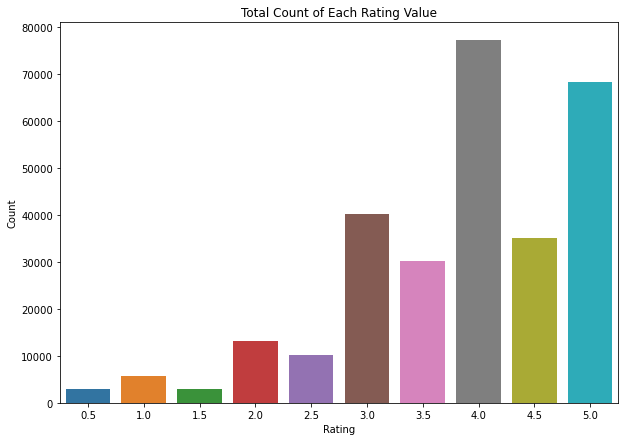

In [28]:
# Let's create a barplot with the values from the above dataframe.
plt.figure(figsize=(10,7))
sns.barplot(x="Rating", y="Count", data=rating_count)
plt.title("Total Count of Each Rating Value")

Text(0.5, 1.0, 'Percentage of Each Rating Value')

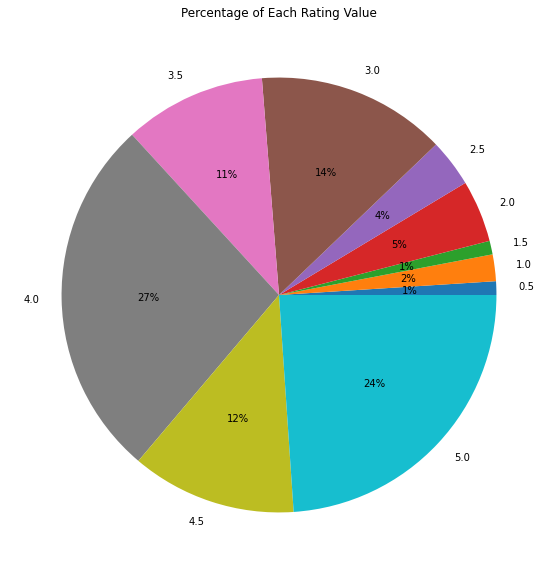

In [30]:
# Also let's create a pie chart to see the percentage of each rating value.
plt.figure(figsize=(10,10))
colors = sns.color_palette()
plt.pie(x="Count", labels="Rating", data=rating_count, colors=colors, autopct='%.0f%%')
plt.title("Percentage of Each Rating Value")

## 3. Which Genres Get Better Ratings

In [31]:
ratings_final

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag,title,genres,imdbId,tmdbId
0,1,1,4.0,2000-07-30 18:45:03,pixar,2006-02-04 09:36:04,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
1,1,1,4.0,2000-07-30 18:45:03,pixar,2006-01-14 02:47:05,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
2,1,1,4.0,2000-07-30 18:45:03,fun,2018-05-02 18:33:33,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
3,1,3,4.0,2000-07-30 18:20:47,moldy,2006-03-27 02:01:00,Grumpier Old Men (1995),Comedy|Romance,http://www.imdb.com/title/tt0113228/,https://www.themoviedb.org/movie/15602
4,1,3,4.0,2000-07-30 18:20:47,old,2006-03-27 02:01:00,Grumpier Old Men (1995),Comedy|Romance,http://www.imdb.com/title/tt0113228/,https://www.themoviedb.org/movie/15602
...,...,...,...,...,...,...,...,...,...,...
285757,610,168252,5.0,2017-05-03 21:19:12,emotional,2018-05-02 17:59:06,Logan (2017),Action|Sci-Fi,http://www.imdb.com/title/tt03315342/,https://www.themoviedb.org/movie/263115
285758,610,168252,5.0,2017-05-03 21:19:12,gritty,2018-05-02 17:59:00,Logan (2017),Action|Sci-Fi,http://www.imdb.com/title/tt03315342/,https://www.themoviedb.org/movie/263115
285759,610,168252,5.0,2017-05-03 21:19:12,heartbreaking,2018-05-02 17:59:08,Logan (2017),Action|Sci-Fi,http://www.imdb.com/title/tt03315342/,https://www.themoviedb.org/movie/263115
285760,610,168252,5.0,2017-05-03 21:19:12,predictible plot,2018-05-02 17:59:17,Logan (2017),Action|Sci-Fi,http://www.imdb.com/title/tt03315342/,https://www.themoviedb.org/movie/263115


In [53]:
x = list(ratings_final["genres"].unique())
x.sort(key=len, reverse=True)
x


['Action|Adventure|Comedy|Crime|Drama|Film-Noir|Horror|Mystery|Thriller|Western',
 'Action|Animation|Crime|Drama|Film-Noir|Mystery|Sci-Fi|Thriller',
 'Adventure|Animation|Children|Comedy|Fantasy|Musical|Romance',
 'Adventure|Animation|Children|Comedy|Crime|Fantasy|Mystery',
 'Adventure|Animation|Children|Comedy|Drama|Musical|Romance',
 'Action|Adventure|Animation|Comedy|Fantasy|Mystery|Sci-Fi',
 'Adventure|Animation|Children|Comedy|Fantasy|Sci-Fi|IMAX',
 'Animation|Children|Comedy|Fantasy|Musical|Romance|IMAX',
 'Adventure|Comedy|Drama|Fantasy|Mystery|Sci-Fi|Thriller',
 'Action|Adventure|Drama|Fantasy|Romance|Sci-Fi|Thriller',
 'Action|Adventure|Animation|Children|Comedy|Sci-Fi|IMAX',
 'Adventure|Animation|Children|Fantasy|Musical|Romance',
 'Action|Animation|Comedy|Crime|Drama|Romance|Thriller',
 'Adventure|Animation|Children|Comedy|Fantasy|Romance',
 'Adventure|Animation|Children|Comedy|Musical|Romance',
 'Action|Drama|Fantasy|Horror|Mystery|Sci-Fi|Thriller',
 'Adventure|Animation|Ch

In [190]:
ratings_by_genres = ratings_final.copy()
ratings_by_genres["genres"] = ratings_by_genres["genres"].map(lambda x: [i for i in str.split(x, sep="|")])
ratings_by_genres = ratings_by_genres.explode("genres")
ratings_by_genres

,userId,movieId,rating,timestamp_rating,tag,timestamp_tag,title,genres,imdbId,tmdbId
0,1,1,4.0,2000-07-30 18:45:03,pixar,2006-02-04 09:36:04,Toy Story (1995),Adventure,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
0,1,1,4.0,2000-07-30 18:45:03,pixar,2006-02-04 09:36:04,Toy Story (1995),Animation,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
0,1,1,4.0,2000-07-30 18:45:03,pixar,2006-02-04 09:36:04,Toy Story (1995),Children,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
0,1,1,4.0,2000-07-30 18:45:03,pixar,2006-02-04 09:36:04,Toy Story (1995),Comedy,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
0,1,1,4.0,2000-07-30 18:45:03,pixar,2006-02-04 09:36:04,Toy Story (1995),Fantasy,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
...,...,...,...,...,...,...,...,...,...,...
285760,610,168252,5.0,2017-05-03 21:19:12,predictible plot,2018-05-02 17:59:17,Logan (2017),Sci-Fi,http://www.imdb.com/title/tt03315342/,https://www.themoviedb.org/movie/263115
285761,610,170875,3.0,2017-05-03 21:20:15,none,none,The Fate of the Furious (2017),Action,http://www.imdb.com/title/tt04630562/,https://www.themoviedb.org/movie/337339
285761,610,170875,3.0,2017-05-03 21:20:15,none,none,The Fate of the Furious (2017),Crime,http://www.imdb.com/title/tt04630562/,https://www.themoviedb.org/movie/337339
285761,610,170875,3.0,2017-05-03 21:20:15,none,none,The Fate of the Furious (2017),Drama,http://www.imdb.com/title/tt04630562/,https://www.themoviedb.org/movie/337339


In [196]:
print(sorted(ratings_by_genres["genres"].unique(), key=len))
print(len(ratings_by_genres["genres"].unique()))

['War', 'IMAX', 'Crime', 'Drama', 'Comedy', 'Action', 'Horror', 'Sci-Fi', 'Fantasy', 'Romance', 'Mystery', 'Western', 'Musical', 'Children', 'Thriller', 'Adventure', 'Animation', 'Film-Noir', 'Documentary', '(no genres listed)']
20


In [207]:
ratings_by_genres_2 = ratings_by_genres.groupby(["genres", "rating"])["userId"].count().reset_index().sort_values(by=["rating", "userId"], ascending=False)
ratings_by_genres_2

,genres,rating,userId
88,Drama,5.0,47131
178,Thriller,5.0,38507
68,Crime,5.0,36215
58,Comedy,5.0,31756
18,Action,5.0,19857
...,...,...,...
129,Musical,0.5,59
189,Western,0.5,19
99,Film-Noir,0.5,14
69,Documentary,0.5,8


In [179]:
rating_top_3 = ratings_by_genres_2[ratings_by_genres_2["rating"] == 6]

for i in list(ratings_by_genres_2["rating"].unique()):
    rating_top_3 = rating_top_3.append(ratings_by_genres_2[ratings_by_genres_2["rating"] == i].head(3))

rating_top_3


,genres,rating,userId
88,Drama,5.0,47131
178,Thriller,5.0,38507
68,Crime,5.0,36215
87,Drama,4.5,23702
177,Thriller,4.5,18463
67,Crime,4.5,16448
86,Drama,4.0,46027
176,Thriller,4.0,34428
56,Comedy,4.0,30043
85,Drama,3.5,15533


Text(0, 0.5, 'Count')

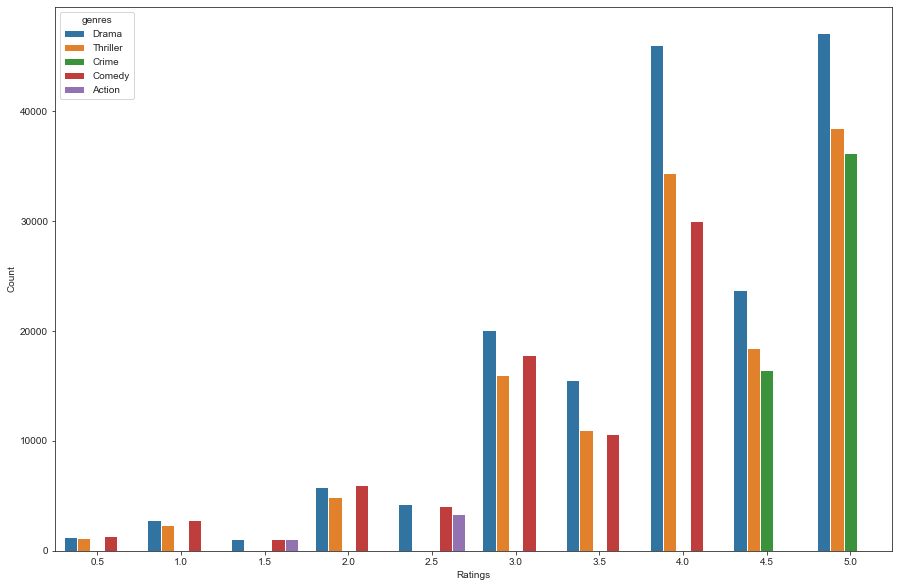

In [212]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="rating", y="userId", hue="genres", data=rating_top_3)
ax.set_xlabel("Ratings")
ax.set_ylabel("Count")

In [213]:
ratings_5 = ratings_by_genres_2[ratings_by_genres_2["rating"] == 5]
ratings_5

,genres,rating,userId
88,Drama,5.0,47131
178,Thriller,5.0,38507
68,Crime,5.0,36215
58,Comedy,5.0,31756
18,Action,5.0,19857
168,Sci-Fi,5.0,13654
28,Adventure,5.0,12723
158,Romance,5.0,5827
148,Mystery,5.0,5825
188,War,5.0,4044


Text(0, 0.5, 'Genres')

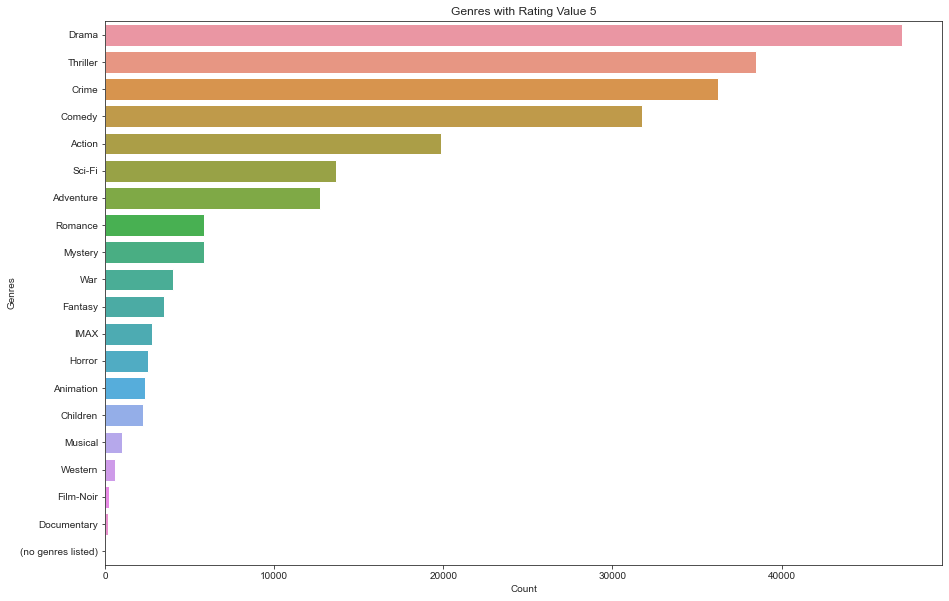

In [216]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="userId", y="genres", data=ratings_5)
ax.set_title("Genres with Rating Value 5")
ax.set_xlabel("Count")
ax.set_ylabel("Genres")

<AxesSubplot:xlabel='userId', ylabel='genres'>

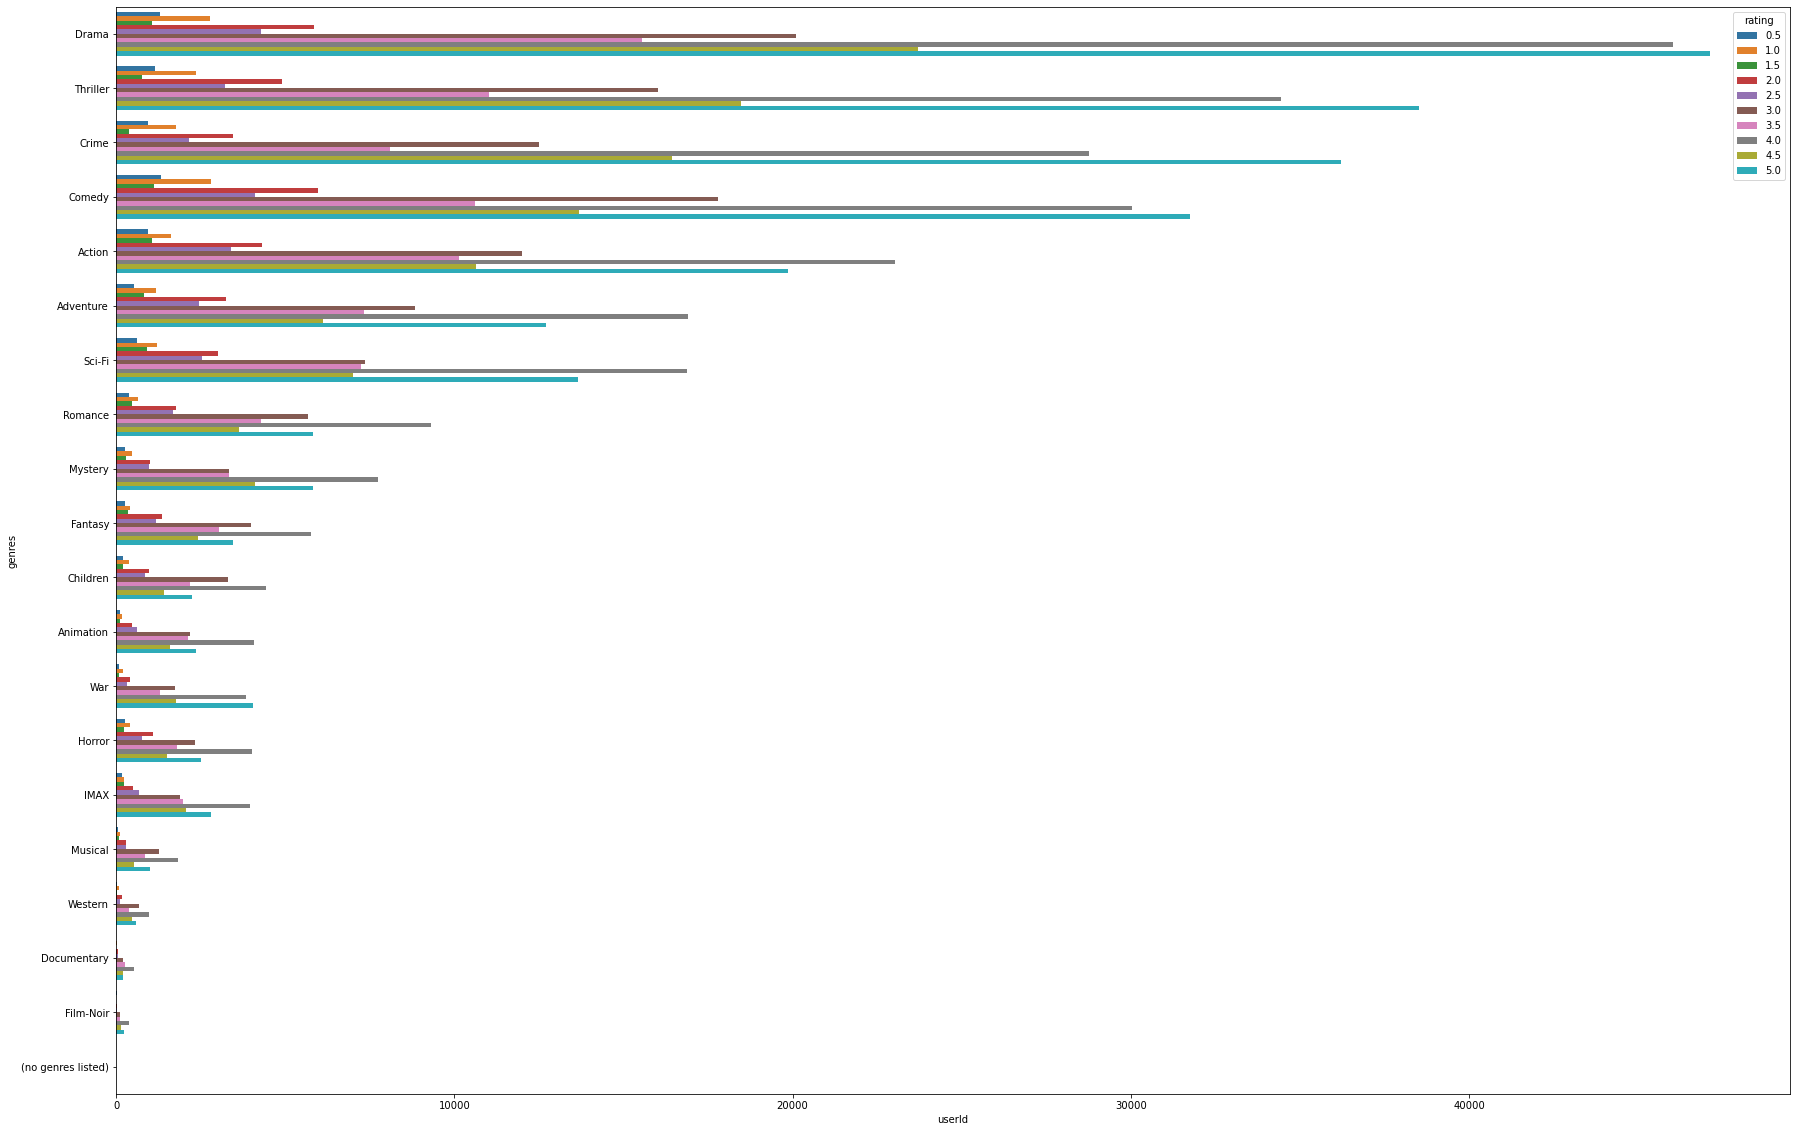

In [107]:
plt.figure(figsize=(30, 20))
sns.barplot(x="userId", y="genres", data=ratings_by_genres_2, hue="rating")

## 4. Rating Count by Each Year

## 5. Which Tags Used Most